In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel("data.xlsx")
df = df.drop('№', axis = 1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,6,150,1.8,24,30,120,3.4,15
1,7,150,1.8,24,30,120,9.7,5
2,6,170,1.8,24,30,120,7.4,23
3,7,170,1.8,24,30,120,10.6,8
4,6,150,2.4,24,30,120,6.5,20


In [13]:
# Нормалізація даних
data_norm = (df - df.mean()) / df.std()
data_norm.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,-0.991031,-0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-2.605167,-0.081459
1,0.991031,-0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-0.358521,-1.194072
2,-0.991031,0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-1.178725,0.808631
3,0.991031,0.991031,-0.991031,-0.858258,-0.858258,-0.858258,-0.037571,-0.860288
4,-0.991031,-0.991031,0.991031,-0.858258,-0.858258,-0.858258,-1.499674,0.474847


In [14]:
# Визначення кількості кластерів
k = 4
# Створення моделі k-середніх
kmeans = KMeans(n_clusters=k, n_init=10)

# Навчання моделі на нормалізованих даних
kmeans.fit(data_norm)

# Передбачення кластерів для даних
labels = kmeans.predict(data_norm)
labels

array([2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

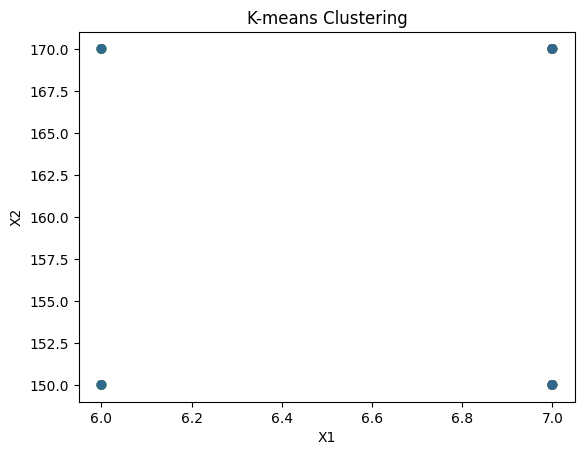

In [15]:
# Відображення кластерів на графіку
#plt.scatter(df['X1'], df['X2'], c=labels)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering')
plt.show()

In [25]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


# Відокремлюємо ознаки
X = df.iloc[:, 1:].values

# Нормалізація даних
scaler = StandardScaler()
X = scaler.fit_transform(X)


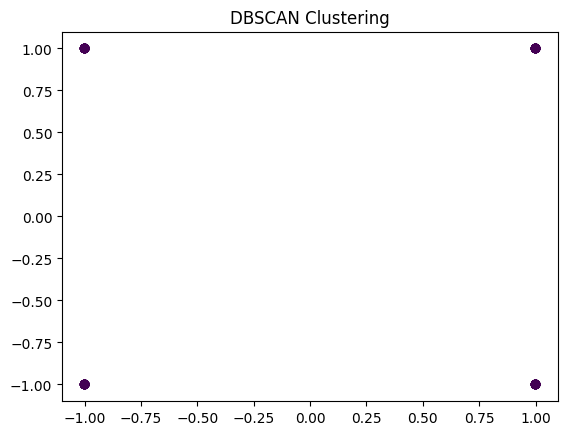

In [26]:
# Кластеризація даних з використанням алгоритму DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Відображення результатів кластеризації
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN Clustering")
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters = 5

# створення об'єкту алгоритму
krab = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# виконання кластеризації
labels = krab.fit_predict(df)

# оцінка якості кластеризації за допомогою коефіцієнту силуету
silhouette_avg = silhouette_score(df, labels)

# вивід результатів
print('Number of clusters:', n_clusters)
print('Silhouette score:', silhouette_avg)
print('Cluster labels:', labels)

Number of clusters: 5
Silhouette score: 0.26492677239010104
Cluster labels: [4 4 3 1 4 4 1 1 2 2 1 1 2 2 1 1 0 4 1 1 0 4 1 1 2 2 1 1 0 2 1 1 0 4 3 3 0
 0 3 3 0 2 3 3 2 2 3 3 0 0 3 3 0 0 3 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
